In [390]:
import matplotlib.pyplot as plt
from helpers.cm26 import DatasetCM26, remesh
from helpers.computational_tools import select_NA, select_Pacific, StateFunctions, compare
import numpy as np
%load_ext autoreload
%autoreload 3

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [363]:
ds = DatasetCM26()

In [364]:
one_deg = ds.coarsen(4)

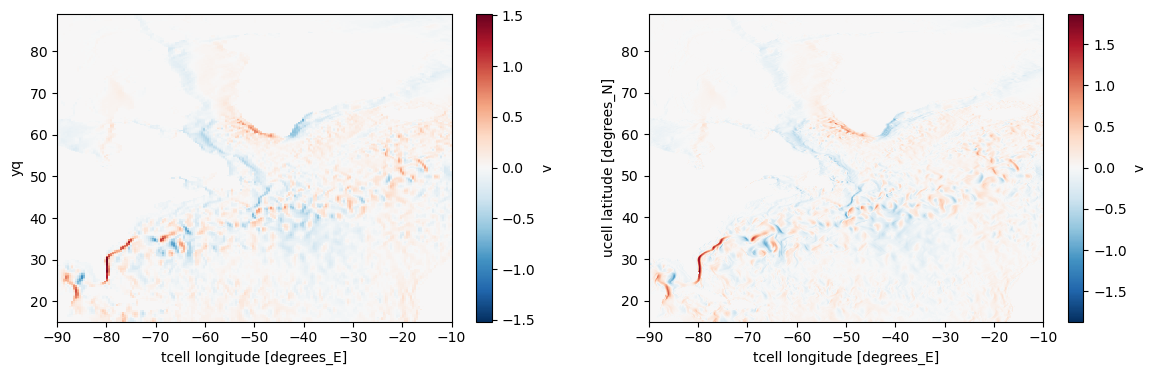

In [365]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
select_NA(one_deg.data.v).plot()
plt.subplot(1,2,2)
select_NA(ds.data.v).plot()

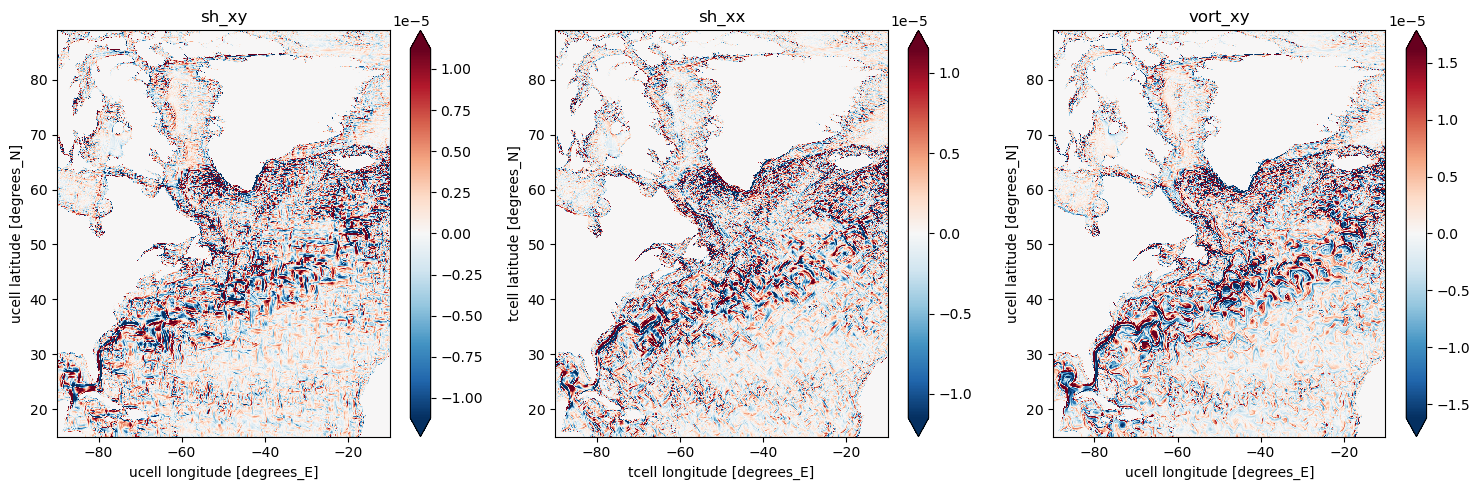

In [366]:
sh_xy, sh_xx, vort_xy = ds.state.velocity_gradients()
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
select_NA(sh_xy).plot(robust=True); plt.title('sh_xy')
plt.subplot(1,3,2)
select_NA(sh_xx).plot(robust=True); plt.title('sh_xx')
plt.subplot(1,3,3)
select_NA(vort_xy).plot(robust=True); plt.title('vort_xy')
plt.tight_layout()

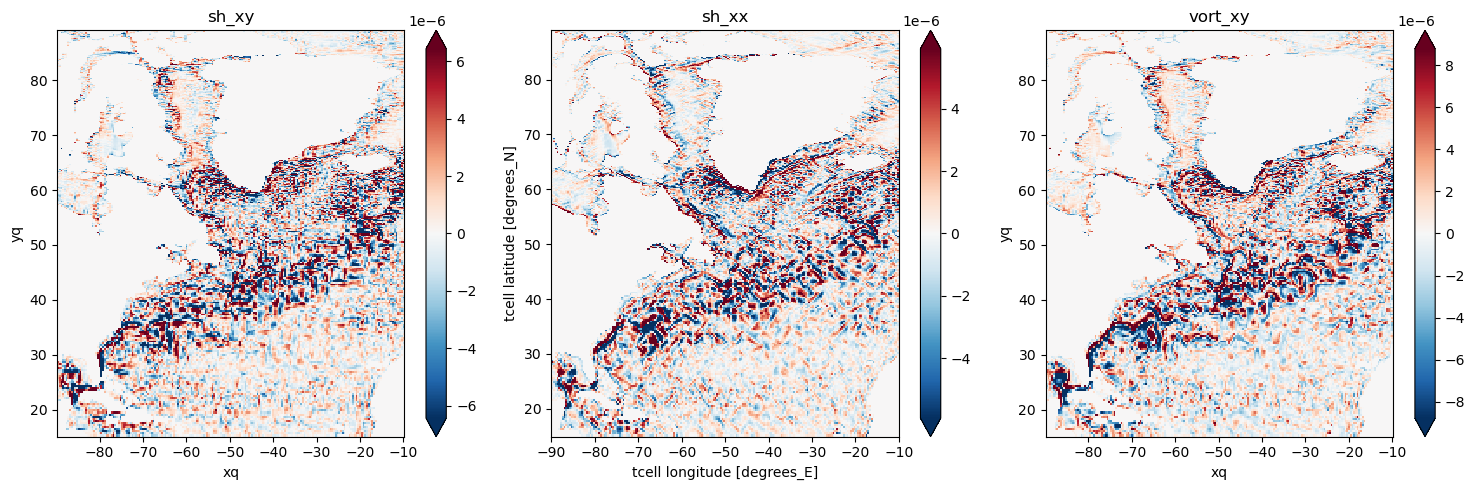

In [367]:
sh_xy, sh_xx, vort_xy = one_deg.state.velocity_gradients()
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
select_NA(sh_xy).plot(robust=True); plt.title('sh_xy')
plt.subplot(1,3,2)
select_NA(sh_xx).plot(robust=True); plt.title('sh_xx')
plt.subplot(1,3,3)
select_NA(vort_xy).plot(robust=True); plt.title('vort_xy')
plt.tight_layout()

In [368]:
SGS = ds.subgrid_forcing(one_deg)
SGSx = SGS['SGSx']
SGSy = SGS['SGSy']

ZB = one_deg.state.ZB20(ZB_scaling=1)
ZBx = ZB['ZB2020u']
ZBy = ZB['ZB2020v']

Text(0.5, 1.0, 'ZB20 zonal')

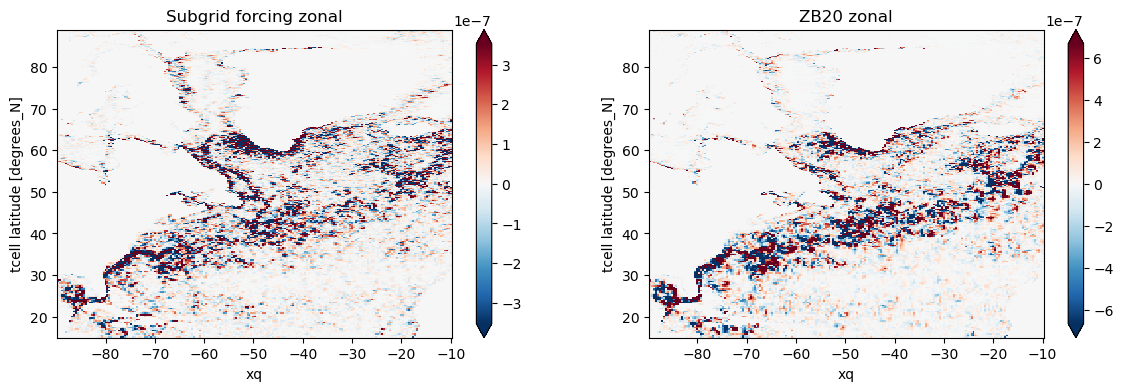

In [369]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
select_NA(SGSx).plot(robust=True)
plt.title('Subgrid forcing zonal')
plt.subplot(1,2,2)
select_NA(ZBx).plot(robust=True)
plt.title('ZB20 zonal')

Text(0.5, 1.0, 'ZB20 meridional')

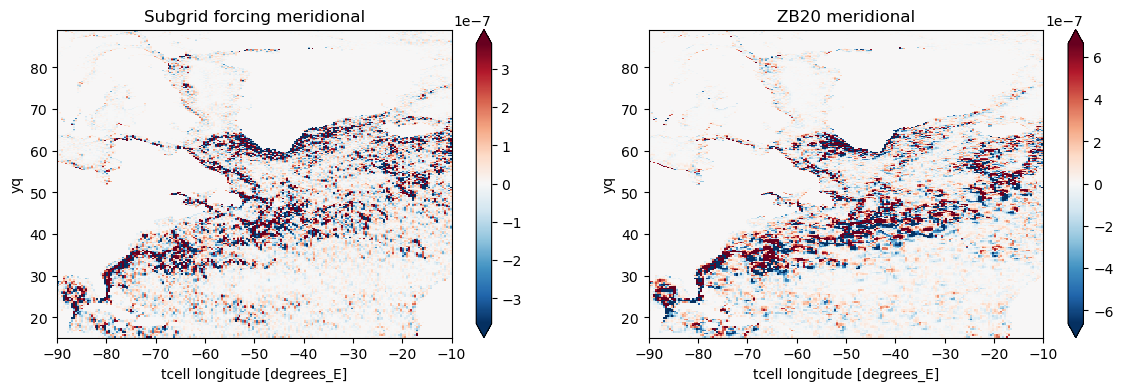

In [370]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
select_NA(SGSy).plot(robust=True)
plt.title('Subgrid forcing meridional')
plt.subplot(1,2,2)
select_NA(ZBy).plot(robust=True)
plt.title('ZB20 meridional')

In [371]:
xr.corr(ZBx,SGSx,dim=['xq','yh']).isel(time=-1).values

array(0.46019855)

In [372]:
xr.corr(ZBy,SGSy,dim=['xh','yq']).isel(time=-1).values

array(0.46113295)

In [373]:
ZB_scaling = ((SGSx * ZBx).mean(['xq', 'yh']) + (SGSy * ZBy).mean(['xh', 'yq'])) / ((ZBx*ZBx).mean(['xq', 'yh']) + (ZBy*ZBy).mean(['xh', 'yq']))

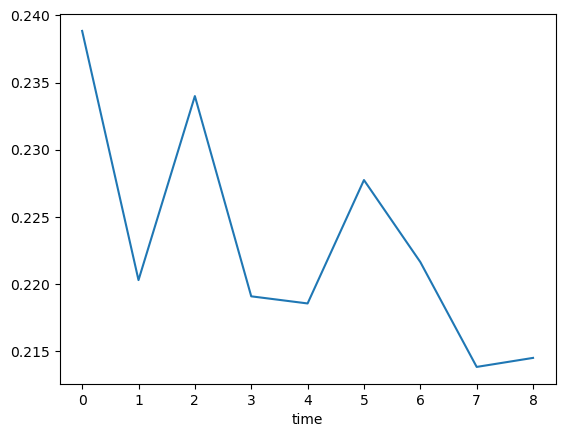

In [374]:
ZB_scaling.isel(time=slice(None,None,1000)).plot()

# ZB with optimal scaling

In [375]:
ZB = one_deg.state.ZB20(ZB_scaling=0.3)
ZBx = ZB['ZB2020u']
ZBy = ZB['ZB2020v']

Text(0.5, 1.0, 'ZB20 zonal')

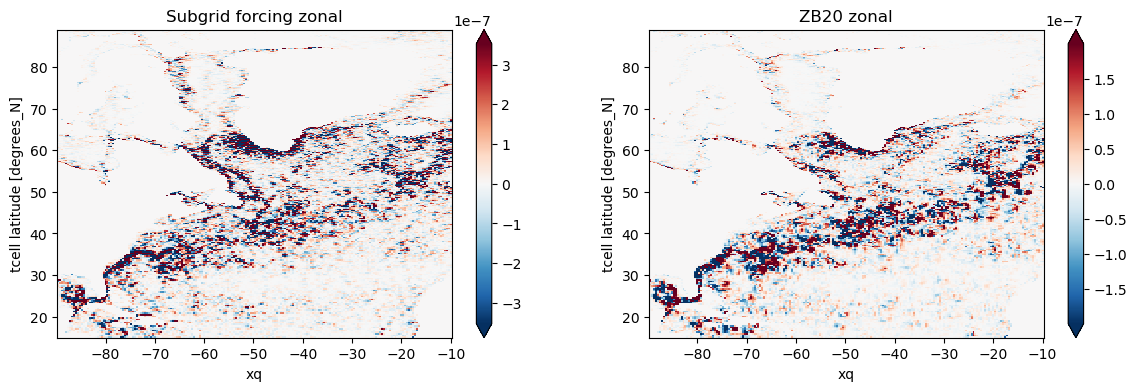

In [376]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
select_NA(SGSx).plot(robust=True)
plt.title('Subgrid forcing zonal')
plt.subplot(1,2,2)
select_NA(ZBx).plot(robust=True)
plt.title('ZB20 zonal')

Text(0.5, 1.0, 'ZB20 zonal')

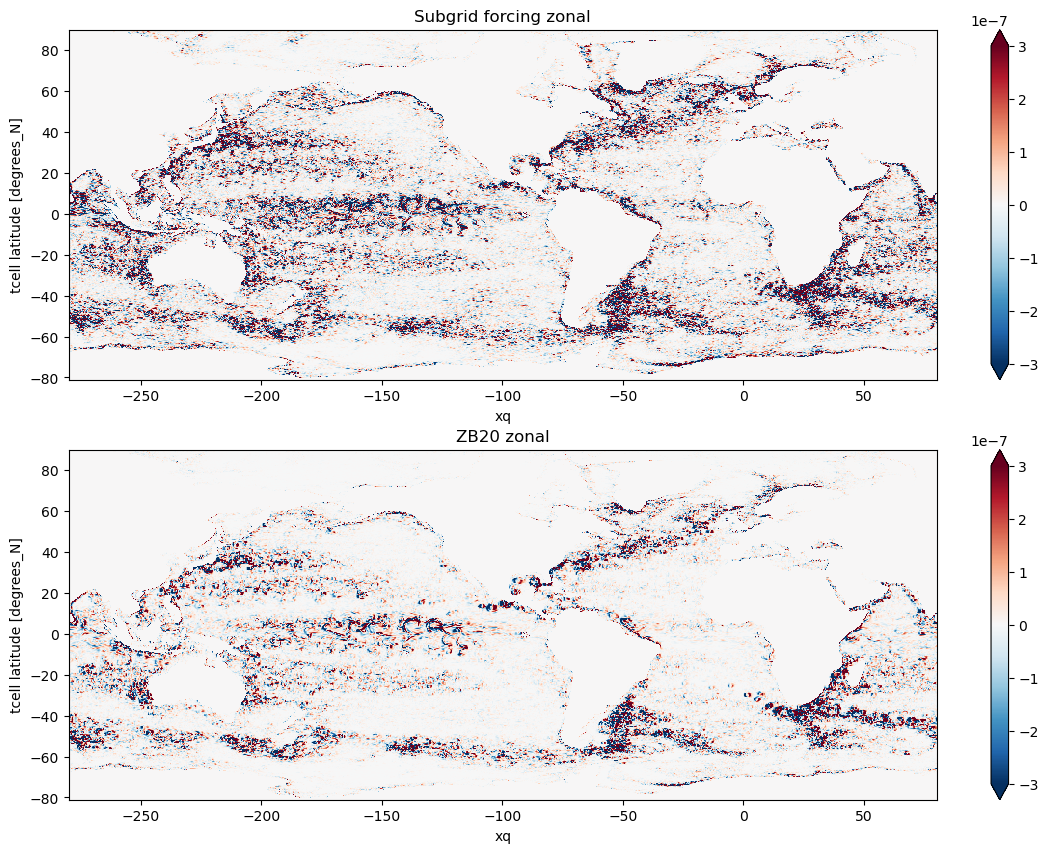

In [377]:
plt.figure(figsize=(14,10))
plt.subplot(2,1,1)
SGSx.isel(time=-1).plot(robust=True, vmax=3e-7)
plt.title('Subgrid forcing zonal')
plt.subplot(2,1,2)
ZBx.isel(time=-1).plot(robust=True, vmax=3e-7)
plt.title('ZB20 zonal')

Text(0.5, 1.0, 'ZB20 meridional')

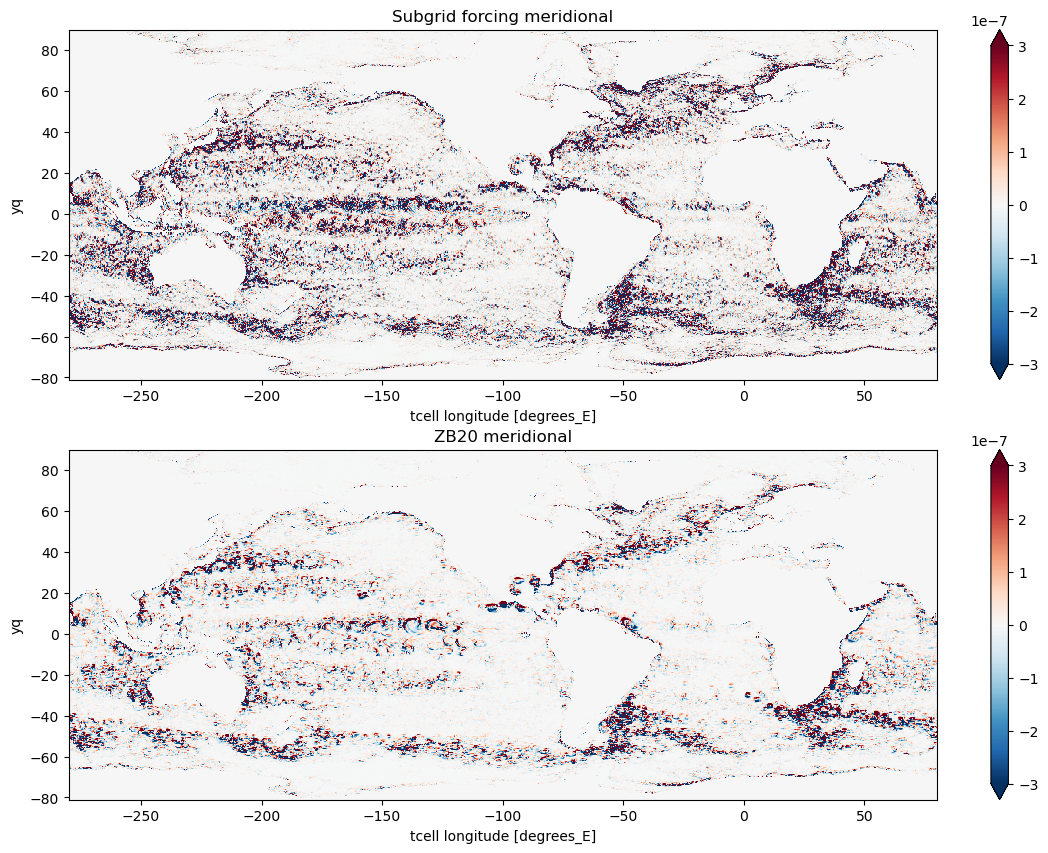

In [378]:
plt.figure(figsize=(14,10))
plt.subplot(2,1,1)
SGSy.isel(time=-1).plot(robust=True, vmax=3e-7)
plt.title('Subgrid forcing meridional')
plt.subplot(2,1,2)
ZBy.isel(time=-1).plot(robust=True, vmax=3e-7)
plt.title('ZB20 meridional')

In [379]:
uc1 = one_deg.data.u
uc2 = remesh(ds.data.u, ds, one_deg)
np.abs(uc1-uc2).isel(time=-1).max().values

array(0., dtype=float32)

In [380]:
uc1 = one_deg.data.v
uc2 = remesh(ds.data.v, ds, one_deg)
np.abs(uc1-uc2).isel(time=-1).max().values

array(0., dtype=float32)

Correlation: 0.36211777140227563
Relative Error: 0.9786124195962422
R2 =  0.09673516599895948
Optinal scaling: 0.6611710946048196
Nans: 0


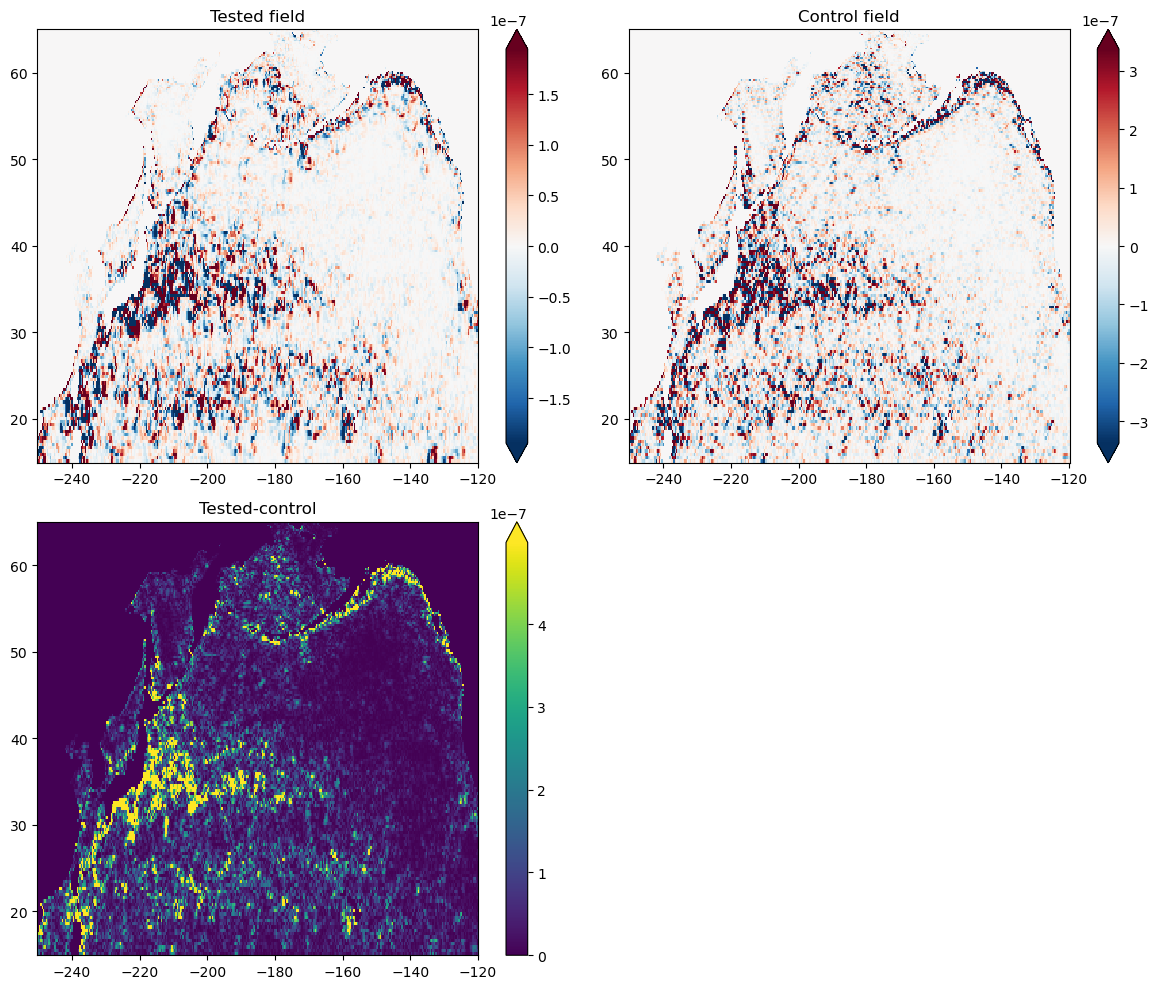

In [395]:
compare(ZBx, SGSx, one_deg.param.wet_u, selector=select_Pacific)

Correlation: 0.40465813127484385
Relative Error: 0.9573787851725002
R2 =  0.15764419894263149
Optinal scaling: 0.8383133519461993
Nans: 0


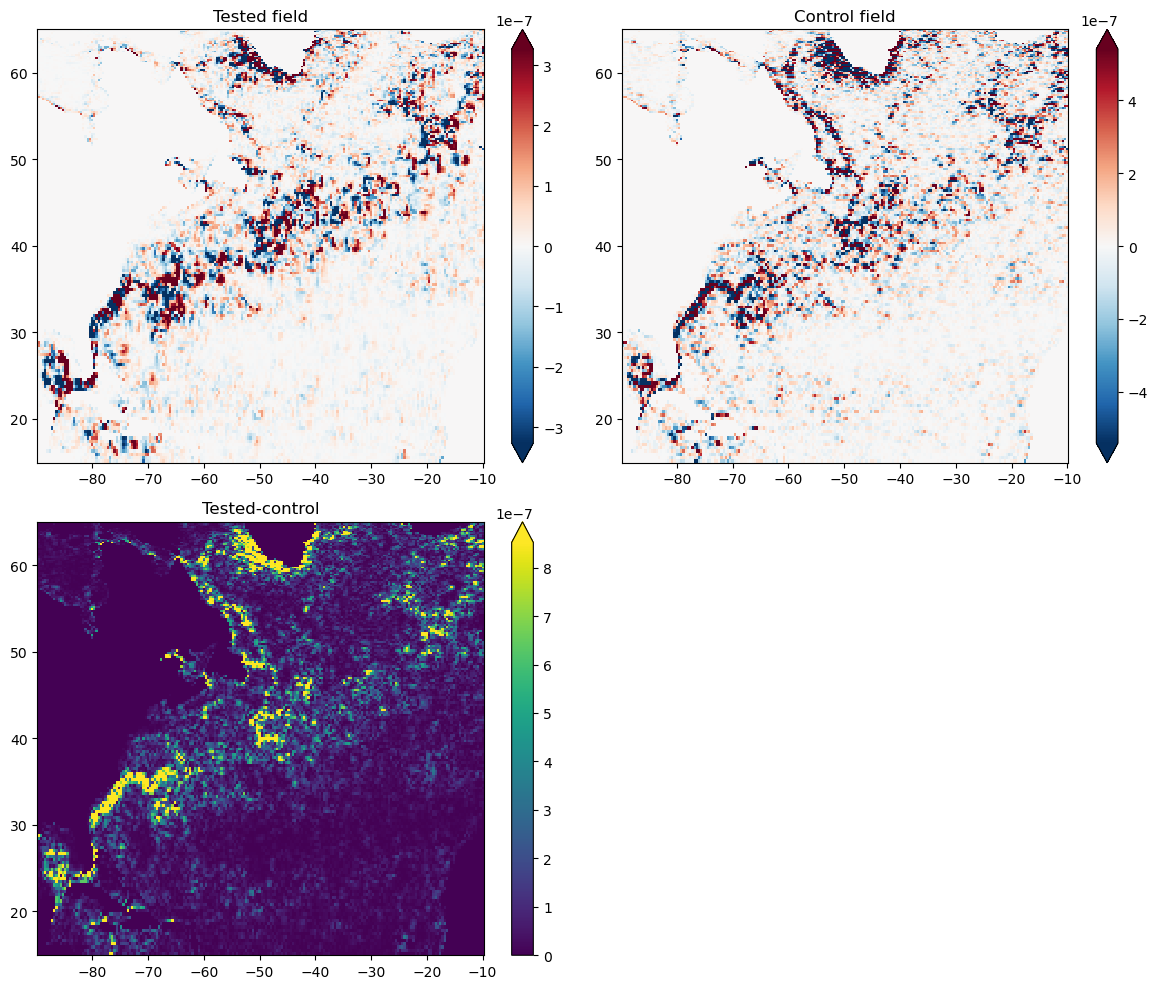

In [396]:
compare(ZBx, SGSx, one_deg.param.wet_u, selector=select_NA)

Correlation: 0.28762547835741964
Relative Error: 1.0409446337592736
R2 =  -0.034964571733738126
Optinal scaling: 0.45594048325176956
Nans: 0


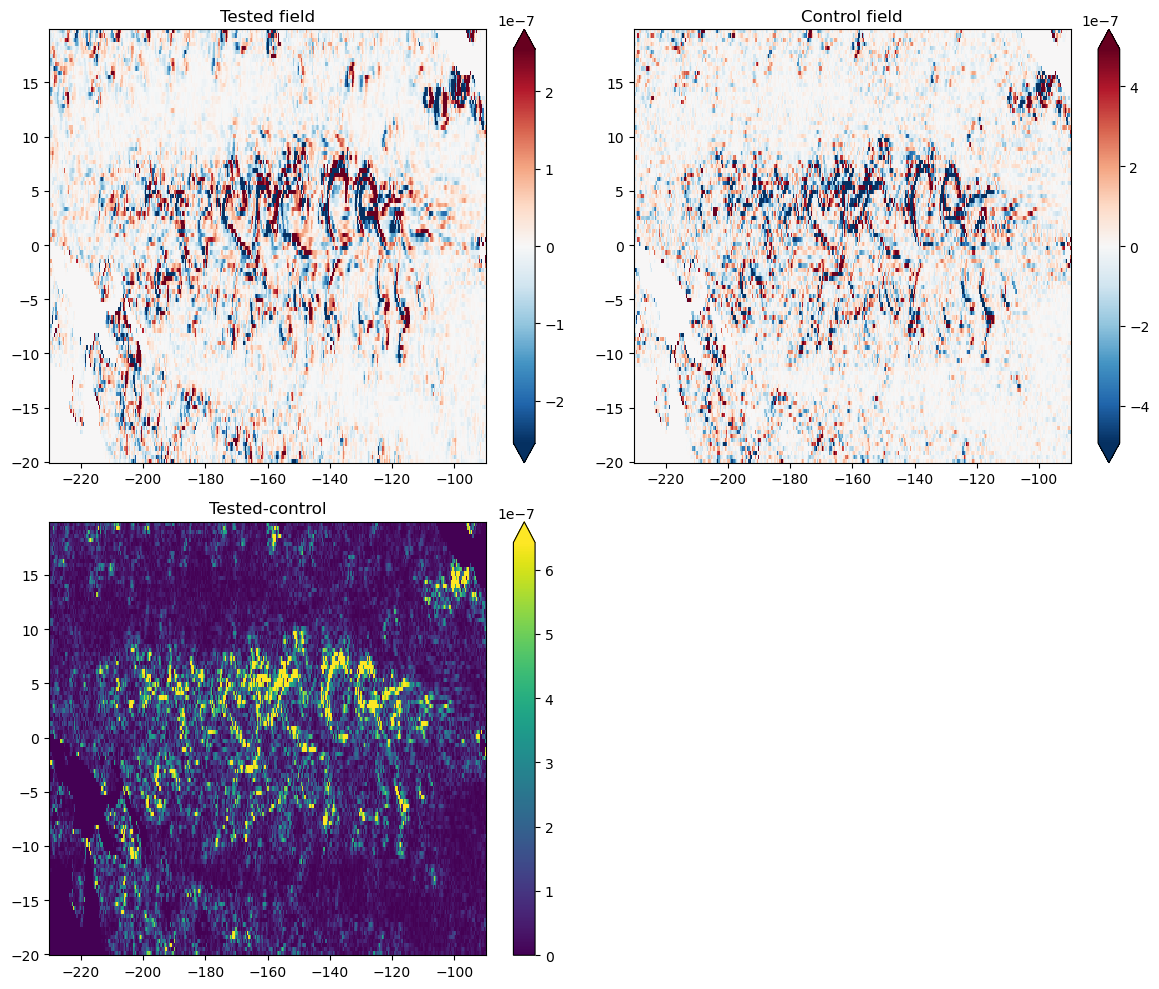

In [ ]:
compare(ZBx, SGSx, one_deg.param.wet_u, selector=select_Equator)